# Predicting Diabetes

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Reading in Data

In [54]:
df = pd.read_csv('../data/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Visualization

c:\users\rebs\documents\dev\data-science-env\env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


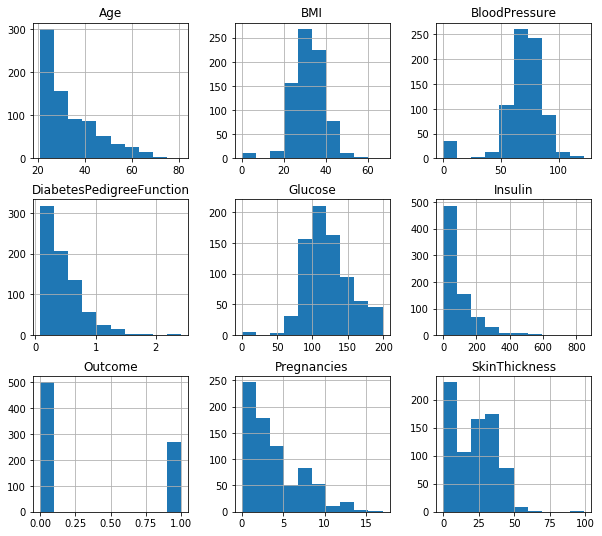

In [3]:
fig = plt.figure(figsize=(10, 9))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

c:\users\rebs\documents\dev\data-science-env\env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\rebs\documents\dev\data-science-env\env\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


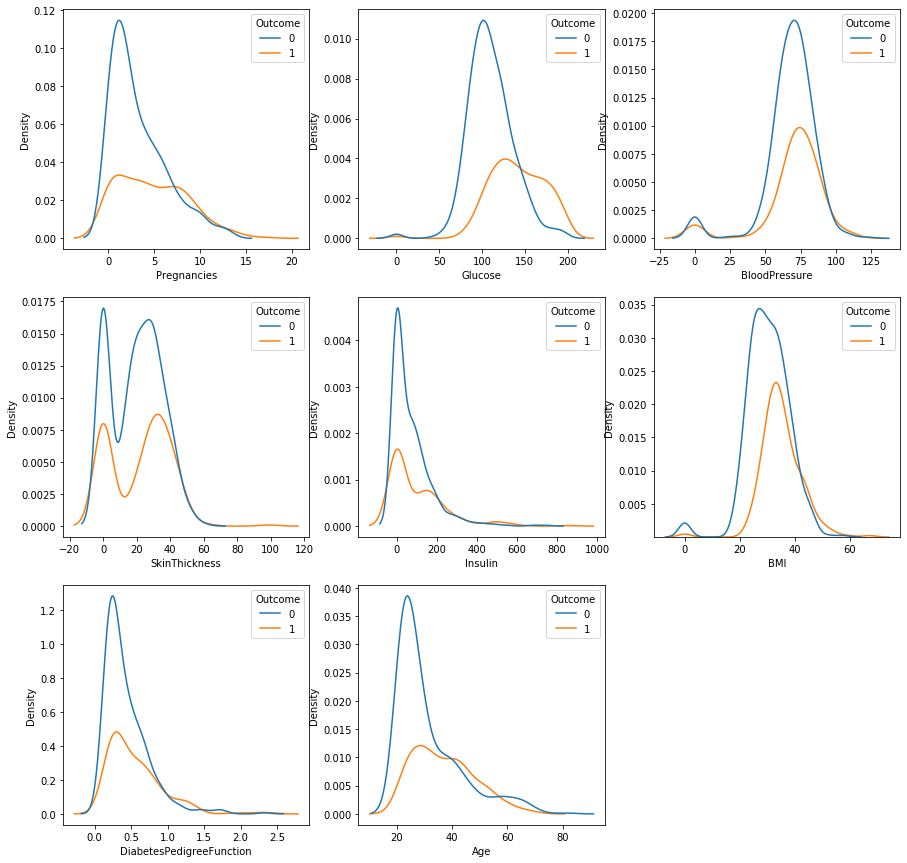

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, idx+1)
    sns.kdeplot(data=df, x=col, hue='Outcome', ax=ax)
plt.subplot(3, 3, 9).set_visible(False)
plt.show()

## Pre-processing

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print('Missing Values per Column')
for col in df.columns:
    missing_count = df[df[col] == 0].shape[0]
    print(str(col) + ': ' + str(missing_count))

Missing Values per Column
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [8]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [9]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

### Normalization

In [10]:
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-3.351824e-02,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-5.298590e-01,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-6.953060e-01,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-5.298590e-01,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669e+00,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
5,0.342981,-0.186965,1.319287e-01,8.087936e-16,-3.345079e-16,-0.998077,-0.818079,-0.275760,0
6,-0.250952,-1.436303,-1.853434e+00,3.240194e-01,-7.950054e-01,-0.212128,-0.676133,-0.616111,1
7,1.827813,-0.219843,1.175571e-15,8.087936e-16,-3.345079e-16,0.413720,-1.020427,-0.360847,0
8,-0.547919,2.476096,-1.989652e-01,1.803778e+00,4.560094e+00,-0.284901,-0.947944,1.681259,1
9,1.233880,0.108930,1.951845e+00,8.087936e-16,-3.345079e-16,0.000000,-0.724455,1.766346,1


In [11]:
df.describe().loc[['mean', 'std', 'max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


### Train-Test Split

In [12]:
x = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

## Modeling

In [17]:
model = Sequential()

In [18]:
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 0.6467 - accuracy: 0.6925
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.7128
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7271
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7352
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7454
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7658
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7739
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7841
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7841
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.7882
Epoch 11/

## Results

In [26]:
scores = model.evaluate(x_train, y_train)
print('Training accuracy: %.2f%%\n' % (scores[1] * 100))

scores = model.evaluate(x_test, y_test)
print('Testing accuracy: %.2f%%\n' % (scores[1] * 100))

16/16 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9308
Training accuracy: 93.08%

5/5 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7403
Testing accuracy: 74.03%



### Confusion Matrix

Text(42.0, 0.5, 'Actual')

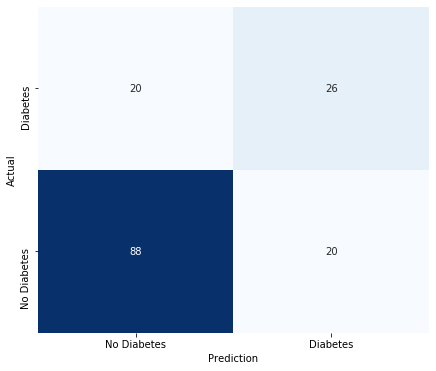

In [47]:
fig = plt.figure(figsize=(7, 6))
y_test_pred = model.predict_classes(x_test)
cf_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cf_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_ylim([0,2])
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

### ROC Curve

In [49]:
y_test_pred_probs = model.predict(x_test)
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

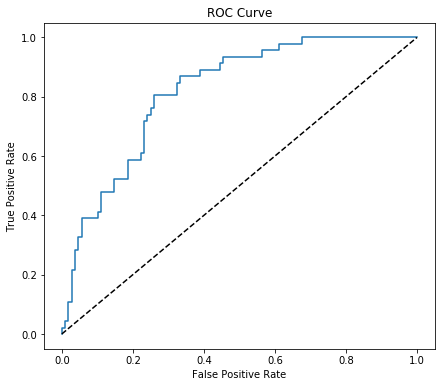

In [52]:
fig = plt.figure(figsize=(7, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')